# K-최근접 이웃 (K-Nearest Neighbors, KNN)
- 분류(Classification)와 회귀(Regression) 를 모두 지원한다.
- 예측하려는 데이터와 input 데이터들 간의 거리를 측정해 가장 가까운 K개의 데이터셋의 레이블을 참조해 분류/예측한다.
- 학습시 단순히 input 데이터들을 저장만 하며 예측 시점에 거리를 계산한다.
    - 학습은 빠르지만 예측시 시간이 많이 걸린다.


## 추론 알고리즘
![knn1](images/knn-1.png)

- K-NN에서 **K**는 새로운 데이터포인트를 분류할때 확인할 데이터 포인트의 개수를 지정하는 **하이퍼파라미터**

![knn-2](images/knn-2.png)

- **분류****
    - K를 1로 하면 <font color='blue'>파란색</font>, K를 3으로 하면 <font color='orange'>주황색</font> 으로 분류한다.
- ****회귀****
    - K를 1로 하면 <font color='blue'>파란색</font>, K를 3으로 하면 <font color='orange'>주황색</font> data point의 평균값으로 추론한다.
- K가 너무 작으면 Overfitting이 일어날 수 있고 K가 너무 크면 Underfitting이 발생할 수 있다.
    - Overfitting: K값을 더 크게 잡는다.
    - Underfitting: K값을 더 작게 잡는다.

## 주요 하이퍼 파라미터
- **분류: sklearn.neighbors.KNeighborsClassifier**,  **회귀: sklearn.neighbors.KNeighborsRegressor**
- 이웃 수 
    - n_neighbors = K
    - **K가 작을 수록 모델이 복잡해져 과대적합이 일어나고 너무 크면 단순해져 성능이 나빠진다.(과소적합)**
    - n_neighbors는 Feature수의 제곱근 정도를 지정할 때 성능이 좋은 것으로 알려져 있다.
- 거리 재는 방법 
    - p=2: 유클리디안 거리(Euclidean distance - 기본값 - L2 Norm)
    - p=1: 맨하탄 거리(Manhattan distance - L1 Norm)
    

> ### 유클리디안 거리(Euclidean_distance)
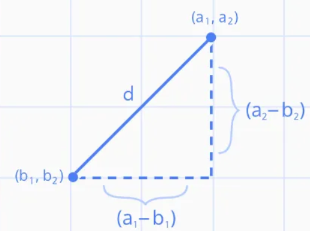

$$
distance = \sqrt{(a_1 - b_1)^2 + (a_2-b_2)^2}\\
n차원 벡터간의 거리 = \sqrt{(a_1 - b_1)^2 + (a_2-b_2)^2 +...+(a_n-b_n)^2}
$$

> ### 맨하탄 거리 (Manhattan distance)
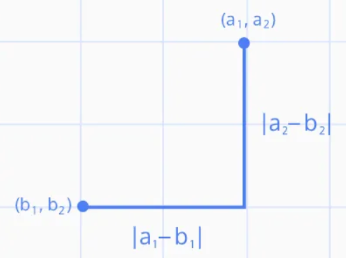

$$
distance = |a_1 - b_1| + |a_2 - b_2| \\
𝑛차원벡터간의거리= |a_1 - b_1| + |a_2 - b_2| + ... + |a_n - b_n|
$$

## 요약
- K-NN은 이해하기 쉬운 모델이며 튜닝할 하이퍼파라미터의 수가 적어 빠르게 만들 수있다.

- K-NN은 서비스할 모델을 구현할때 보다는 **복잡한 알고리즘을 적용해 보기 전에 확인용 또는 base line을 잡기 위한 모델로 사용한다.**

- 훈련세트가 너무 큰 경우(Feature나 관측치의 개수가 많은 경우) 거리를 계산하는 양이 늘어나 예측이 느려진다.
    - 추론에 시간이 많이 걸린다.

- Feature간의 값의 단위가 다르면 작은 단위의 Feature에 영향을 많이 받게 되므로 **전처리로 Feature Scaling작업**이 필요하다.

- Feature가 너무 많은 경우와 대부분의 값이 0으로 구성된(희소-sparse) 데이터셋에서 성능이 아주 나쁘다

## 위스콘신 유방암 데이터를 이용한 암환자분류
### K값 변화에 따른 성능 변화 확인

##### 데이터셋 로드, train/test set 분리

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

##### Feature scaling

In [2]:
# KNN은 feature scaling을 해야 정확한 학습이 가능.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### 학습
- k값 변화에 따른 accuracy의 변화 확인

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

train_acc = []
test_acc = []

k_list = range(1, 11)
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    train_pred = knn.predict(X_train_scaled)
    test_pred = knn.predict(X_test_scaled)
    
    train_acc.append(accuracy_score(y_train, train_pred))
    test_acc.append(accuracy_score(y_test, test_pred))

In [7]:
train_acc

[1.0,
 0.9835680751173709,
 0.9859154929577465,
 0.9812206572769953,
 0.9788732394366197,
 0.9765258215962441,
 0.9765258215962441,
 0.9788732394366197,
 0.9741784037558685,
 0.9765258215962441,
 0.9765258215962441,
 0.9788732394366197,
 0.9741784037558685,
 0.9788732394366197,
 0.9765258215962441,
 0.9741784037558685,
 0.9671361502347418,
 0.9741784037558685,
 0.9647887323943662]

In [9]:
test_acc

[0.951048951048951,
 0.9300699300699301,
 0.951048951048951,
 0.965034965034965,
 0.951048951048951,
 0.951048951048951,
 0.958041958041958,
 0.951048951048951,
 0.951048951048951,
 0.951048951048951,
 0.951048951048951,
 0.9440559440559441,
 0.951048951048951,
 0.951048951048951,
 0.951048951048951,
 0.951048951048951,
 0.951048951048951,
 0.951048951048951,
 0.951048951048951]

In [11]:
import pandas as pd

df = pd.DataFrame({
    'train':train_acc, 
    'test':test_acc
}, index=k_list)
df

,train,test
1,1.000000,0.951049
2,0.983568,0.930070
3,0.985915,0.951049
4,0.981221,0.965035
5,0.978873,0.951049
6,0.976526,0.951049
7,0.976526,0.958042
8,0.978873,0.951049
9,0.974178,0.951049
10,0.976526,0.951049


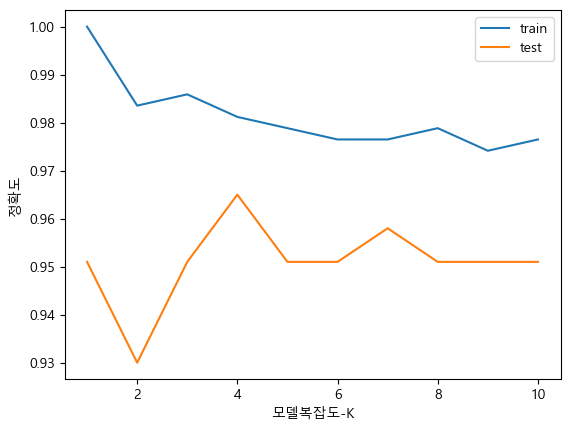

In [17]:
df.plot(xlabel="모델복잡도-K", ylabel='정확도');

# overfitting 발생 - k를 큰값을 변경
# underfitting 발생 - k를 작은값을 변경

In [19]:
np.sqrt(30)

5.477225575051661

##### 결과확인

## TODO: GridSearch/Pipline 을 이용해 구현
- Pipeline을 이용해 전처리기와 모델을 연결한다.
- GridSearchCV를 이용해 최적의 하이퍼파라미터를 검색한다.

##### Pipeline/GridSearchCV 생성 및 학습

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# 파이프라인
steps = [
    ('scaler', StandardScaler()), 
    ('knn', KNeighborsClassifier())
]
pipeline = Pipeline(steps, verbose=True)

In [22]:
# GridSearchCV 생성
params = {
    "knn__n_neighbors":range(1,11), 
    "knn__p":[1, 2]
}
gs = GridSearchCV(pipeline, 
                  params, 
                  scoring='accuracy', 
                  cv=4, 
                  n_jobs=-1)
gs.fit(X_train, y_train)

[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing knn, total=   0.0s


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())],
                                verbose=True),
             n_jobs=-1,
             param_grid={'knn__n_neighbors': range(1, 11), 'knn__p': [1, 2]},
             scoring='accuracy')

##### 결과확인

In [23]:
gs.best_params_

{'knn__n_neighbors': 6, 'knn__p': 2}

In [24]:
gs.best_score_

0.976569388114971

In [26]:
result_df = pd.DataFrame(gs.cv_results_).sort_values('rank_test_score')
result_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,param_knn__p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
11,0.005363,0.000283,0.006357,0.000532,6,2,"{'knn__n_neighbors': 6, 'knn__p': 2}",0.962617,0.971963,1.000000,0.971698,0.976569,0.014041,1
15,0.008502,0.003619,0.008856,0.002274,8,2,"{'knn__n_neighbors': 8, 'knn__p': 2}",0.953271,0.971963,1.000000,0.971698,0.974233,0.016695,2
14,0.007273,0.002879,0.011922,0.002289,8,1,"{'knn__n_neighbors': 8, 'knn__p': 1}",0.943925,0.971963,0.990566,0.981132,0.971896,0.017437,3
10,0.007501,0.000430,0.009515,0.001131,6,1,"{'knn__n_neighbors': 6, 'knn__p': 1}",0.943925,0.971963,0.990566,0.981132,0.971896,0.017437,3
19,0.004070,0.001615,0.006257,0.001239,10,2,"{'knn__n_neighbors': 10, 'knn__p': 2}",0.953271,0.971963,1.000000,0.962264,0.971874,0.017532,5


In [27]:
# 최종 평가
accuracy_score(y_test, gs.predict(X_test))

0.951048951048951